In [102]:
#county-carbon footprint

#HENRY & JUN
# !pip install ipynb
#!pip install sklearn
#!pip install mlxtend
import ipynb.fs.full.general_model_pipeline_vl


import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression, Ridge, Lasso, RidgeCV, LassoCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error

# Importing the Data

In [103]:
data = pd.read_csv("../../data/jonesKammen-PlUS-CoolClimate.csv")
data.head()


,CountyName,num_vehicles,miles_traveled_year,num_short_flights,num_med_flights,num_long_flights,electricity_billPerYear,housing_squarefeet,moneySpentOnClothesPerYear,result_grand_total,Population,PersonsPerHousehold,AverageHouseValue,IncomePerHousehold,popden,electricity (kWh),Nat. Gas (cu.ft.),FUELOIL (gallons),Vehicle miles traveled,HouseholdsPerZipCode
0,ALAMEDA,242.0,1613500.0,483.0,126.0,89.0,97190.0,211948.5,40510.762336,5277.395845,1333498,111.87,13884600,2590891,258994.046896,275913.455348,1.768720e+06,22.368750,983886,505952
1,ALPINE,15.0,86300.0,27.0,8.0,3.0,5440.0,14048.0,2366.563071,295.877796,1071,6.22,1177601,84191,5.789275,11596.212856,5.219063e+04,28.795106,34414,1002
2,AMADOR,87.0,700100.0,162.0,39.0,27.0,37630.0,71966.0,14149.849255,2018.848980,35248,24.21,1578400,442394,2747.175496,68394.867629,2.955696e+05,14.518174,284242,15061
3,BUTTE,123.0,998900.0,213.0,52.0,10.0,54640.0,107009.0,16113.001961,2604.068576,202888,44.85,2079400,655472,10312.749190,120787.352491,6.899601e+05,36.925198,472138,85714
4,CALAVERAS,175.0,1113000.0,305.0,52.0,40.0,71800.0,136184.0,23597.085432,3541.542685,40500,45.15,2824300,632518,4685.232602,128358.485485,5.235352e+05,140.920772,445448,22884


# Test and Train Splitting

We split our data into train and test data (80/20) and use a random seed of 100 for reproducibility.

In [67]:
# set the seed for reproducibility
rs = 100
np.random.seed(100)

# frac train
train_size = 0.8

In [68]:
train_data = data.sample(frac=train_size)
test_data = data[data['CountyName'].apply(lambda x: x not in train_data['CountyName'].values)]
train_data.drop(columns='CountyName', inplace=True)
test_data.drop(columns='CountyName', inplace=True)

/Users/junkang/opt/anaconda3/lib/python3.7/site-packages/pandas/core/frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [70]:
train_data.shape, test_data.shape

((46, 19), (12, 19))

## Forecasting and Prediction Modeling (25 points)

This section is where the rubber meets the road.  In it you must:
1. Explore at least 3 prediction modeling approaches for each prediction question, ranging from the simple (e.g. linear regression, KNN) to the complex (e.g. SVM, random forests, Lasso).  
2. Motivate all your modeling decisions.  This includes parameter choices (e.g., how many folds in k-fold cross validation, what time window you use for averaging your data) as well as model form (e.g., If you use regression trees, why?  If you include nonlinear features in a regression model, why?). 
1. Carefully describe your cross validation and model selection process.  You should partition your data into training and testing data sets.  The training data set is what you use for cross-validation (i.e. you sample from within it to create folds, etc.).  The testing data set is held to the very end of your efforts, and used to compare qualitatively different models (e.g. OLS vs random forests).
4. Very carefully document your workflow.  We will be reading a lot of projects, so we need you to explain each basic step in your analysis.  
5. Seek opportunities to write functions allow you to avoid doing things over and over, and that make your code more succinct and readable. 

### Prediction Model 1: Linear Regression

Splitting data...
Fitting Model...
[Train MSE: 257.7345]
[Train R^2: 0.9998269178480956]
[Test MSE: 2477.0426]
[Test R^2: 0.9998269178480956]
----FINISHED----


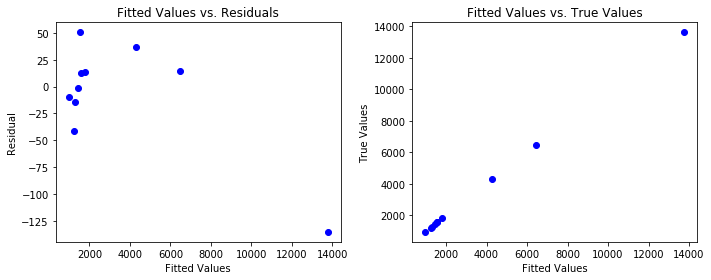

In [72]:
X_train, X_val, y_train, y_val = gmp.preprocess_data(train_data, 'result_grand_total')

lr_model = LinearRegression()
lr_model = gmp.run_model(X_train, X_val, y_train, y_val, lr_model, diagnostics=True)

### Prediction Model 2: Ridge Regression

In [73]:
X_train, X_val, y_val, y_val = gmp.preprocess_data(train_data, 'result_grand_total', standardize = True)

alphas = [0, 0.001, 0.01, 0.1, 1, 10, 100]
gmp.linreg_kfold_cv(RidgeCV, X_train, X_val, y_train, y_val, alphas)

Splitting data...
optimal alpha: 0.001
Test MSE with cross-validated RidgeCV: 2208.32118881742
[R^2: 0.9998456946271328]


/Users/junkang/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.001

### Prediction Model 3: Lasso Regression

In [79]:
X_train, X_val, y_val, y_val = gmp.preprocess_data(train_data, 'result_grand_total', standardize = True)

alphas = [0, 0.001, 0.01, 0.1, 1, 10, 100]
gmp.linreg_kfold_cv(LassoCV, X_train, X_val, y_train, y_val, alphas)

Splitting data...
optimal alpha: 0.01
Test MSE with cross-validated LassoCV: 10745.513202786471
[R^2: 0.99924916247247]


/Users/junkang/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/junkang/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/junkang/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/junkang/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/coordinate_descent.py:471: UserWarning: Coordinate descent with alpha=0 may lead to unexpected results and is discouraged.
  tol, rng, random, positive)
/Users/junkang/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_mode

0.01

Splitting data...
Fitting Model...
[Train MSE: 1923.9908]
[Train R^2: 0.99924916247247]
[Test MSE: 10745.5132]
[Test R^2: 0.99924916247247]
----FINISHED----


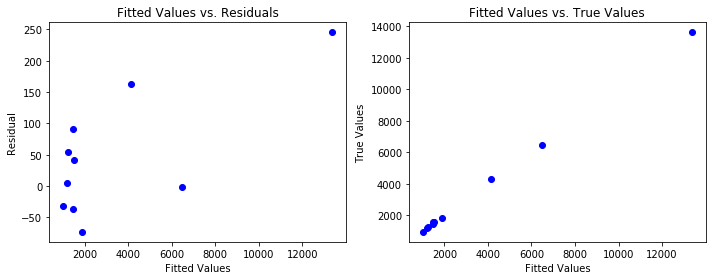

In [81]:
X_train, X_val, y_train, y_val = gmp.preprocess_data(train_data, 'result_grand_total', standardize = True)

lasso_model = Lasso(alpha=0.01)
lasso_model = gmp.run_model(X_train, X_val, y_train, y_val, lasso_model, diagnostics=True)

### Prediction Model 4: Decision Tree

In [75]:
param_dist = {'max_leaf_nodes': np.arange(2, 27),
              'max_features': np.arange(2, X_train.shape[1] + 1),
              'max_depth': np.arange(2,12)}

tree = DecisionTreeRegressor(random_state = rs, max_depth = 4, max_features=5, max_leaf_nodes=10)
gmp.tree_kfold_cv(tree, param_dist, X_train, y_train, n_iter=1000, random_state = rs)

0.8050647862141757
{'max_leaf_nodes': 11, 'max_features': 17, 'max_depth': 11}


/Users/junkang/opt/anaconda3/lib/python3.7/site-packages/sklearn/model_selection/_search.py:814: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


### Prediction Model 5: Random Forest

Fitting Model...
[Train MSE: 2009817.1679]
[Train R^2: 0.9981518447505682]
[Test MSE: 26449.6325]
[Test R^2: 0.9981518447505682]
----FINISHED----


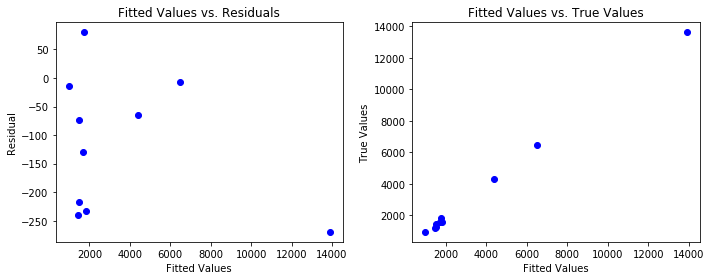

In [78]:
forest_model = RandomForestRegressor(n_estimators = 500, random_state = rs, max_depth = 5)
forest_model = gmp.run_model(X_train, X_val, y_train, y_val, forest_model, diagnostics=True)

## Interpretation and Conclusions (20 points)
In this section you must relate your modeling and forecasting results to your original prediction question.  You must:
1. Address a resource allocation question.  What do the answers mean? What advice would you give a decision maker on the basis of your results?  How might they allocate their resources differently with the results of your model?  Why should the reader care about your results?
2. Discuss caveats and / or reasons your results might be flawed.  No model is perfect, and understanding a model's imperfections is extremely important for the purpose of knowing how to interpret your results.  Often, we know the model output is wrong but we can assign a direction for its bias.  This helps to understand whether or not your answers are conservative.  

Shoot for 500-1000 words for this section.